**Employee Importance**

You are given a data structure of employee information, which includes the employee's unique id, his importance value and his direct subordinates' id.

For example, employee 1 is the leader of employee 2, and employee 2 is the leader of employee 3. They have importance value 15, 10 and 5, respectively. Then employee 1 has a data structure like [1, 15, [2]], and employee 2 has [2, 10, [3]], and employee 3 has [3, 5, []]. Note that although employee 3 is also a subordinate of employee 1, the relationship is not direct.

Now given the employee information of a company, and an employee id, you need to return the total importance value of this employee and all his subordinates.

Example 1:
```
Input: [[1, 5, [2, 3]], [2, 3, []], [3, 3, []]], 1
Output: 11
Explanation:
Employee 1 has importance value 5, and he has two direct subordinates: employee 2 and employee 3. They both have importance value 3. So the total importance value of employee 1 is 5 + 3 + 3 = 11.
```
Ok so first thing's first, we need a better way to access each employee than looping through and looking for the right id each time. so we should set up a dictionary of employee.id : employee for each employee in employees. This set up will take O(n) but enable O(1) look up afterward. 

Then we can do a simple search, either bfs or dfs, while keeping track of the total importance of each employee that ends up enqueued/stacked. 

The runtime will be the number of subordinates of the target employee. Because there's no way to tell how many that will be, the general runtime will be O(n) where n = number of total employees. Same goes for the space complexity of the queue. 

In [ ]:
"""
# Employee info
class Employee:
    def __init__(self, id: int, importance: int, subordinates: List[int]):
        # It's the unique id of each node.
        # unique id of this employee
        self.id = id
        # the importance value of this employee
        self.importance = importance
        # the id of direct subordinates
        self.subordinates = subordinates
"""
class Solution:
    def getImportance(self, employees: List['Employee'], id: int) -> int:
        empMap = {emp.id: emp for emp in employees}
        if id not in empMap: return
        target = empMap[id]
        total = 0
        q = [target]
        while q:
            curr = q.pop(0)
            total += curr.importance
            for sub in curr.subordinates:
                q.append(empMap[sub])
        return total

**Oranges Rotting**

In a given grid, each cell can have one of three values:

- the value 0 representing an empty cell;
- the value 1 representing a fresh orange;
- the value 2 representing a rotten orange.
- Every minute, any fresh orange that is adjacent (4-directionally) to a rotten orange becomes rotten.

Return the minimum number of minutes that must elapse until no cell has a fresh orange.  If this is impossible, return -1 instead.

Hmmm. This seems like almost an inverse bfs, because we want to track all the fresh oranges rather than the rotten ones, but the rotten ones are behaving like a bfs. Every minute, we need to go through all of the fresh oranges and check if they've been rotted. But we can't immediately update them because that will affect the other oranges too soon. so at each minute, we need to loop through all the fresh oranges, track which oranges to rot, then rot them. Once they've rotted, we can remove them from the list of fresh oranges to check. Once there are no more oranges to check, we can return the number of minutes it's been. If at any point while we're looping, no new oranges have been added to rot but there are more to check, we know that we can't rot all the oranges and can return -1. So we just need to figure out how to loop through the grid with guards against exceeding the length of the lists. 

The runtime on this is long. Suppose n is the number of squares in the grid. first we have a O(n) to populate `toCheck`. but it's an addition to the rest, not a multiplication. Then at each 'minute', we loop through all the squares with 1s in them. We check the 4 squares directly around them, but that's a constant. This process gets shorter each time through but not in a consistent way, so this is also O(n). Then we loop through all the ones that have rotted, but that amount is affected directly by the size of `toCheck`, so this basically completes the O(n) of looping through `toCheck`. It's weird, we're checking more oranges than we have to each time because we should only be checking the ones touching rotting oranges, but leetcode says this answer is faster than 93% of the other submissions. But say the grid is one row with one rotten orange at the start and 1000 fresh ones. we'll have to go through all the fresh ones 1000 times, even as the inner loop gets smaller by one each time. Pretty sure that's O(n^2) worst case...

In [ ]:
class Solution:
    def orangesRotting(self, grid: List[List[int]]) -> int:
        mins = 0
        n = len(grid)
        m = len(grid[0])
        toCheck = set()
        for x in range(n):
            for y in range(m):
                if grid[x][y] == 1:
                    toCheck.add((x,y))
        dirs = [(1,0), (-1,0), (0,1), (0,-1)]
        while len(toCheck) > 0:
            toChange = set()
            for x, y in toCheck:
                for xD, yD in dirs:
                    if 0 <= x + xD < n and 0 <= y + yD < m and grid[x+xD][y+yD] == 2:
                        toChange.add((x,y))
                        break
            if len(toChange) == 0: return -1
            for x, y in toChange:
                grid[x][y] = 2
            toCheck = toCheck - toChange
            mins += 1
        return mins

**Course Schedule**

There are a total of n courses you have to take, labeled from 0 to n-1.

Some courses may have prerequisites, for example to take course 0 you have to first take course 1, which is expressed as a pair: `[0,1]`

Given the total number of courses and a list of prerequisite pairs, is it possible for you to finish all courses?

Note:
The input prerequisites is a graph represented by a list of edges, not adjacency matrices. Read more about how a graph is represented.
You may assume that there are no duplicate edges in the input prerequisites.

Is a node still a node by any other data type? Ok so each pair in the prereqs is a directed edge from the second element to the first, because for example in `[0,1]` above, you cannot take class 0 until you've first visited class 1. This problem is asking for a topological sort that returns false if there are any cycles. Which requires a dfs search, and to do that we want to access all of a node's outedges at a single time (for the for loop in the dfs). We need to organize our list of edges into a structure that we can easily access this way. I'm thinking a dictionary where each node has a list of neighbors it points to. nodes without neighbors can be saved with empty lists in the dict for easier access. our original 'list of verticies' is literally just range(n). And other than that, it's a classic topological sort search for cycles, just switching the fact that the main function should return true if there _isn't_ a cycle, and false if there _is_. 

Runtime is same as a regular dfs plus an extra runthroughs of size V (# of vertices) and an extra runthrough of E (# of edges) to build the prereq dict, but in an additive way, not multiplicative, so it doesn't add to the overall big O. so that's O(V + E). Space complexity is O(V + E) for the prereq dict plus the recursion stack, but it comes down to the same thing as well.

In [ ]:
class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
        self.status = {}
        self.VISITING = -1
        self.VISITED = 0
        self.preqs = {i: [] for i in range(numCourses)}
        for pair in prerequisites:
            self.preqs[pair[1]].append(pair[0])
        for i in range(numCourses):
            if self._hasCycle(i):
                return False
        return True
    
    def _hasCycle(self, i):
        if i in self.status:
            if self.status[i] == self.VISITING:
                return True
            return False
        self.status[i] = self.VISITING
        for nei in self.preqs[i]:
            if self._hasCycle(nei):
                return True
        self.status[i] = self.VISITED
        return False

**Find Eventual Safe States**

In a directed graph, we start at some node and every turn, walk along a directed edge of the graph.  If we reach a node that is terminal (that is, it has no outgoing directed edges), we stop.

Now, say our starting node is eventually safe if and only if we must eventually walk to a terminal node.  More specifically, there exists a natural number K so that for any choice of where to walk, we must have stopped at a terminal node in less than K steps.

Which nodes are eventually safe?  Return them as an array in sorted order.

The directed graph has N nodes with labels 0, 1, ..., N-1, where N is the length of graph.  The graph is given in the following form: graph[i] is a list of labels j such that (i, j) is a directed edge of the graph.

Example:
Input: `graph = [[1,2],[2,3],[5],[0],[5],[],[]]`
Output: `[2,4,5,6]`
Here is a diagram of the above graph. (taken from leetcode)

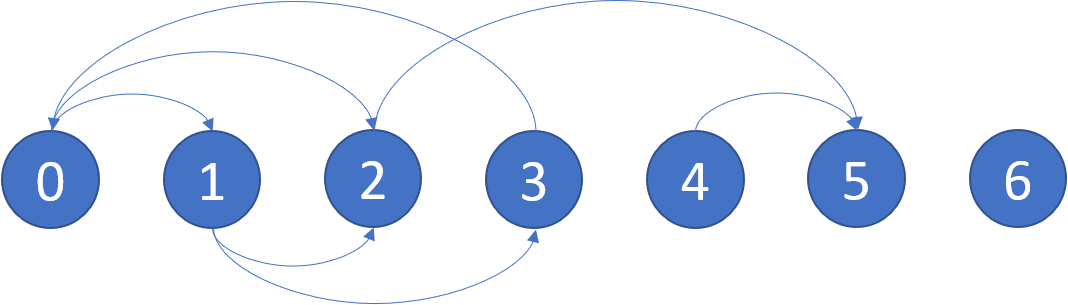

Ok coming off of the course schedule problem, this one was much more intuitive. it's basically the same, except this time whenever we find a cycle, we need to set every single node on that cycle's path to unsafe. This means adding a third state on top of VISITING and VISITED to our status options, one for UNSAFE. now if we ever hit a node that is either in state visiting _or_ state unsafe, we have to set every node in the current path to unsafe. We also need to keep going even if we find a cycle, until every node has been checked by the top loop. Leetcode timed out when I wasn't keeping separate track of the current path, which makes sense because without it you have to loop through the entire status dict every time you need to update a path. so instead, every time you start a new node, a new current path is begun. you add each node to that path as you are VISITING it, and then remove it from the path once it's been VISITED. then if a cycle is found, you loop through all nodes in the current path and set them all to UNSAFE and start anew with the next node. then you can build the list of nodes in your status dictionary that ended up VISITED rather than UNSAFE and you have your eventually safe nodes!

Again the runtime for this is the basic dfs O(V + E) with some additional loops that don't up that runtime. If there are many cycles, you will have to loop over nodes more than once, but not a multiplicative number of times. Space complexity is only larger for tracking the current path and the list of eventual safe states. But these should only get larger at a constant x E so we're good there too.

In [ ]:
class Solution:
    def eventualSafeNodes(self, graph: List[List[int]]) -> List[int]:
        n = len(graph)
        self.graph = graph
        self.VISITING, self.VISITED, self.UNSAFE = -1, 0, 1
        self.status = {}
        for i in range(n):
            currPath = []
            if self.hasCycle(i, currPath):
                for node in currPath:
                    self.status[node] = self.UNSAFE
        return [x for x in self.status if self.status[x] == self.VISITED]
    
    def hasCycle(self, i, currPath):
        if i in self.status:
            if self.status[i] == self.VISITED:
                return False
            return True
        self.status[i] = self.VISITING
        currPath.append(i)
        for node in self.graph[i]:
            if self.hasCycle(node, currPath):
                return True
        self.status[i] = self.VISITED
        currPath.remove(i)
        return False
        
                    